# Support Vector Machines

## IRIS data set
> - **label**: species   
> - **features**: sepal_length, sepal_width, petal_length, petal_width

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [14]:
# Make it binary
data=iris[iris['species']!='virginica']
data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
X = data[['sepal_width','petal_width','sepal_length']]
y = data['species']
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)
print(Xtrain.shape)
print(Xtest.shape)

(75, 3)
(25, 3)


## Estimation

In [17]:
from sklearn.svm import SVC

svc1 = SVC(kernel='linear',C=10)
svc1.fit(Xtrain,ytrain)

SVC(C=10, kernel='linear')

In [18]:
ypred = svc1.predict(Xtest)
ypred[:10]

array(['versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [19]:
svc1.support_vectors_

array([[2.3, 0.3, 4.5],
       [3.4, 0.4, 5.4],
       [3.5, 0.6, 5. ],
       [2.4, 1. , 4.9]])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[16,  0],
       [ 0,  9]])

## Data Visualization

In [9]:
from sklearn.preprocessing import LabelEncoder
y1 = LabelEncoder().fit_transform(ytrain)
y1

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0])

In [12]:
import numpy as np
xx     = np.linspace(2, 5, 100)   #(100,)
xx

array([2.        , 2.03030303, 2.06060606, 2.09090909, 2.12121212,
       2.15151515, 2.18181818, 2.21212121, 2.24242424, 2.27272727,
       2.3030303 , 2.33333333, 2.36363636, 2.39393939, 2.42424242,
       2.45454545, 2.48484848, 2.51515152, 2.54545455, 2.57575758,
       2.60606061, 2.63636364, 2.66666667, 2.6969697 , 2.72727273,
       2.75757576, 2.78787879, 2.81818182, 2.84848485, 2.87878788,
       2.90909091, 2.93939394, 2.96969697, 3.        , 3.03030303,
       3.06060606, 3.09090909, 3.12121212, 3.15151515, 3.18181818,
       3.21212121, 3.24242424, 3.27272727, 3.3030303 , 3.33333333,
       3.36363636, 3.39393939, 3.42424242, 3.45454545, 3.48484848,
       3.51515152, 3.54545455, 3.57575758, 3.60606061, 3.63636364,
       3.66666667, 3.6969697 , 3.72727273, 3.75757576, 3.78787879,
       3.81818182, 3.84848485, 3.87878788, 3.90909091, 3.93939394,
       3.96969697, 4.        , 4.03030303, 4.06060606, 4.09090909,
       4.12121212, 4.15151515, 4.18181818, 4.21212121, 4.24242

In [10]:
# Create grid to evaluate model

import numpy as np
xx     = np.linspace(2, 5, 100)   #(100,)
yy     = np.linspace(0, 2, 100)   #(100,)
YY, XX = np.meshgrid(yy, xx)      #(100,100) and (100,100) Replicate the data

xy     = np.vstack([XX.ravel(), YY.ravel()]).T         # (10000,2)
Z      = svc1.decision_function(xy).reshape(XX.shape)  #(100,100)

/root/.local/share/virtualenvs/app-4PlAip0Q/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 3 features as input.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain['sepal_width'], Xtrain['petal_width'], c=y1, 
            s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc1.support_vectors_[:, 0], svc1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k');

## Nonlinear Kernel

In [21]:
from sklearn.svm import SVC
svc2 = SVC(kernel='poly', degree=2, gamma='auto')
svc2.fit(Xtrain, ytrain)

SVC(degree=2, gamma='auto', kernel='poly')

In [22]:
ypred = svc2.predict(Xtest)

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, ypred)

array([[16,  0],
       [ 0,  9]])

/root/.local/share/virtualenvs/app-4PlAip0Q/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 3 features as input.

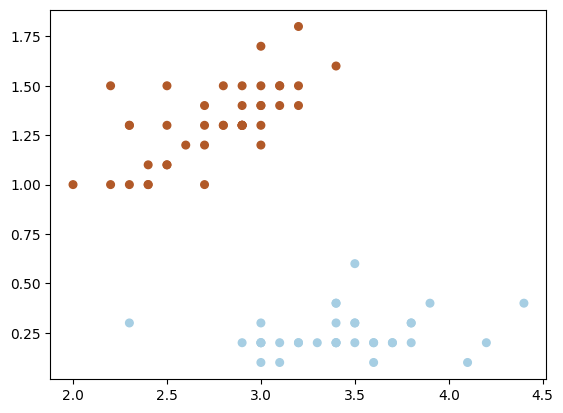

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain['sepal_width'], Xtrain['petal_width'], c=y1, 
            s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()

# create grid to evaluate model
xx = np.linspace(2, 5, 100)
yy = np.linspace(0, 2, 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc2.support_vectors_[:, 0], svc2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Activity 1
> Use the simulation data below to create linear classifier.  
> Plot the figure like above.  

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)

from sklearn.svm import SVC
svc3 = SVC(kernel='linear',C=10)
svc3.fit(Xtrain,ytrain)

In [ ]:
Xtrain[:,0].max()

In [ ]:
ypred = svc3.predict(Xtest)
ypred[:10]

In [ ]:
svc3.support_vectors_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain[:,0], Xtrain[:,1], c=ytrain, 
            s=30, cmap='coolwarm')

# plot the decision function
ax = plt.gca()

# create grid to evaluate model
xx = np.linspace(-1, 4, 50)
yy = np.linspace(-1, 5, 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svc3.support_vectors_[:, 0], svc3.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k');

## Activity 2
> Use the simulation data below to create nonlinear classifier.  
> Plot the figure like above.  

In [ ]:
# from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)

from sklearn.svm import SVC
svc4 = SVC(kernel='poly',degree=2,gamma='scale',C=10)
svc4.fit(Xtrain,ytrain)

In [ ]:
ypred = svc4.predict(Xtest)
ypred[:10]

In [ ]:
svc4.support_vectors_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xtrain[:,0], Xtrain[:,1], c=ytrain, 
            s=30, cmap='coolwarm')

# plot the decision function
ax = plt.gca()

# create grid to evaluate model
xx = np.linspace(-1.5, 1.5, 100)
yy = np.linspace(-1.5, 1.5, 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc4.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(svc4.support_vectors_[:, 0], svc4.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')